In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import auc

In [2]:
datafile = '/home/mmaisonnave/repositories/hrir-simulation-results/data/20newsgroup_results.csv'

df = pd.read_csv(datafile, index_col=0)
print(df.shape)
df.head()

(4200, 19)


,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,representation,category
Date,,,,,,,,,,,,,,,,,,,
2022-11-23 16:40,2474260,logreg,relevance,20newsgroup,941,1,31,0.052352,0.052352,1.000000,0.099494,10,984,0,17812,0,0.100425,bow,rec.motorcycles
2022-11-23 16:40,2474260,logreg,relevance,20newsgroup,941,3,90,0.051876,0.051876,1.000000,0.098635,22,972,0,17765,0,0.065834,bow,rec.motorcycles
2022-11-23 16:40,2474260,logreg,relevance,20newsgroup,941,5,145,0.968472,0.647105,0.856995,0.737405,29,827,17266,451,138,0.039277,bow,rec.motorcycles
2022-11-23 16:40,2474260,logreg,relevance,20newsgroup,941,10,265,0.967891,0.983871,0.382845,0.551205,38,366,17600,6,590,0.042402,bow,rec.motorcycles
2022-11-23 16:40,2474260,logreg,relevance,20newsgroup,941,20,450,0.956576,0.987500,0.165618,0.283662,40,158,17421,2,796,0.043573,bow,rec.motorcycles


In [3]:
models = set(df['Model'])
ranking_functions = set(df['Ranking Function'])
Ns = set(df['N'])
ns = set(df['n'])
representations = set(df['representation'])
categories = set(df['category'])

print(f'{"model":20}\t x{len(models)}')
print(f'{"ranking function":20}\t x{len(ranking_functions)}')
print(f'{"N":20}\t x{len(Ns)}')
print(f'{"n":20}\t x{len(ns)}')
print(f'{"representations":20}\t x{len(representations)}')
print(f'{"categories":20}\t x{len(categories)}')


model               	 x2
ranking function    	 x1
N                   	 x7
n                   	 x5
representations     	 x3
categories          	 x20


In [4]:
# AVERAGING RESULTS FROM DIFFERENT CATEGORIES (20)
count=0
data={}
for N in Ns:
    for n in ns:
        for model in models:
            for representation in representations:
                auxdf=df[(df['Model']==model) & (df['N']==N) & (df['n']==n) &(df['representation']==representation)]
                auxdf=auxdf.drop(columns=['category','Dataset', 'representation', 'Ranking Function', 'Model'])
                auxdict=auxdf.mean().to_dict()
                if len(data)==0: # First iteration
                    for key in auxdict :
                        data[key]=[]
                    data['Model']=[]
                    data['representation']=[]
                for key in auxdict:
                    data[key].append(auxdict[key])
                data['Model'].append(model)
                data['representation'].append(representation)
                    
                    
                assert auxdf.shape[0]==len(categories)
                count+=1
results = pd.DataFrame(data)
results['Dataset']='20newsgroup'
results['Ranking Function']='relevance'
results

,Seed,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,Model,representation,Dataset,Ranking Function
0,2474260.0,4707.0,1.0,47.0,0.218677,0.093481,0.963446,0.152241,10.60,895.50,3211.25,14637.95,35.30,0.046377,logreg,sbert,20newsgroup,relevance
1,2474260.0,4707.0,1.0,47.0,0.049401,0.049401,1.000000,0.094108,13.65,927.75,0.00,17852.25,0.00,0.054786,logreg,bow,20newsgroup,relevance
2,2474260.0,4707.0,1.0,47.0,0.114888,0.057623,0.985580,0.107194,7.95,919.90,1237.70,16608.85,13.55,0.049622,logreg,glove,20newsgroup,relevance
3,2474260.0,4707.0,1.0,47.0,0.327670,0.108501,0.956383,0.169425,11.75,888.95,5264.70,12585.65,40.70,0.046566,svm,sbert,20newsgroup,relevance
4,2474260.0,4707.0,1.0,47.0,0.050048,0.049850,1.000000,0.094922,5.40,936.00,3.90,17840.10,0.00,0.059549,svm,bow,20newsgroup,relevance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2474260.0,1882.0,20.0,570.0,0.966862,0.739202,0.673372,0.667889,87.80,574.65,17077.35,326.05,278.95,0.052294,logreg,bow,20newsgroup,relevance
206,2474260.0,1882.0,20.0,570.0,0.391165,0.154627,0.955891,0.227195,75.20,826.85,6314.65,11076.15,39.35,0.052663,logreg,glove,20newsgroup,relevance
207,2474260.0,1882.0,20.0,570.0,0.535526,0.130796,0.973947,0.220800,81.70,836.80,8940.30,8457.00,22.90,0.052704,svm,sbert,20newsgroup,relevance
208,2474260.0,1882.0,20.0,570.0,0.054661,0.047311,0.999625,0.090313,82.80,858.35,139.60,17258.80,0.25,0.051759,svm,bow,20newsgroup,relevance


Text(0, 0.5, 'F1-Score')

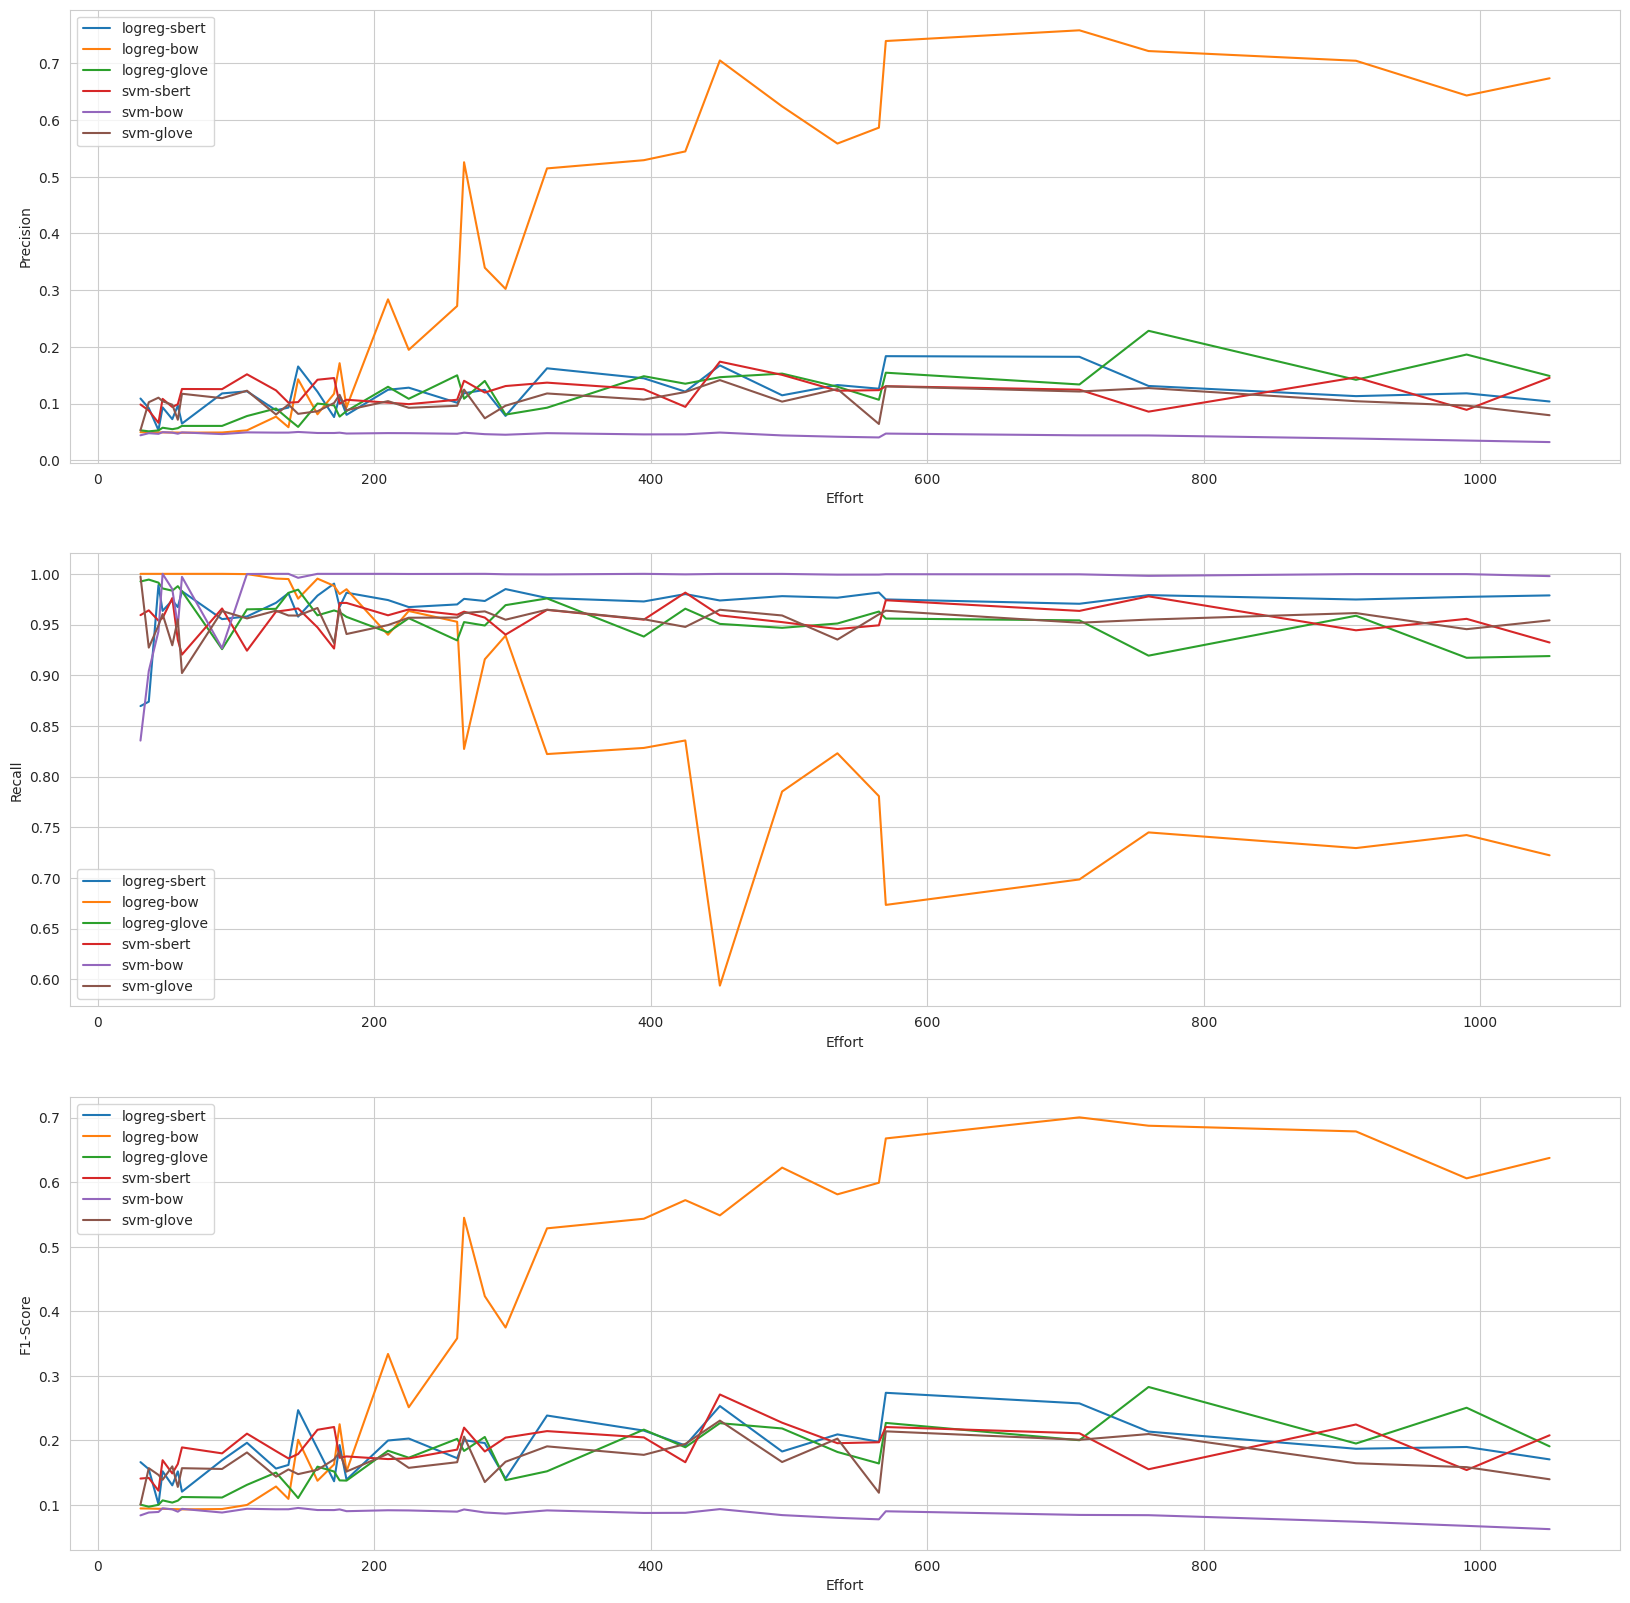

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,1, figsize=(20,20))


auc_data={'auc_precision':[],
          'auc_recall':[],
          'auc_f1':[],
          'model_repr':[]
         }

for model in models:
    for representation in representations:
        auxdf = results[(results['Model']==model) & (results['representation']==representation)]
        auxdf=auxdf.sort_values(by='Effort')
        auc_data['model_repr'].append(f'{model}-{representation}')
        #Precision
        metric='Precision'
        x = auxdf['Effort']
        y = auxdf[metric]
        auc_precision = auc(x,y)/auc(x,[1]*len(y))
        auc_data['auc_precision'].append(auc_precision)
        ax[0].plot(x,y, label=f'{model}-{representation}')
        
        #Recall
        metric='Recall'
        x = auxdf['Effort']
        y = auxdf[metric]
        auc_recall = auc(x,y)/auc(x,[1]*len(y))
        auc_data['auc_recall'].append(auc_recall)
        ax[1].plot(x,y, label=f'{model}-{representation}')
        
        #F1-Score
        metric='F1-Score'
        x = auxdf['Effort']
        y = auxdf[metric]    
        auc_f1 = auc(x,y)/auc(x,[1]*len(y))
        auc_data['auc_f1'].append(auc_f1)
        ax[2].plot(x,y, label=f'{model}-{representation}')
        
        
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_xlabel('Effort')
ax[1].set_xlabel('Effort')
ax[2].set_xlabel('Effort')

ax[0].set_ylabel('Precision')
ax[1].set_ylabel('Recall')
ax[2].set_ylabel('F1-Score')


In [9]:
pd.DataFrame(auc_data).sort_values(by='auc_f1', ascending=False)

,auc_precision,auc_recall,auc_f1,model_repr
1,0.527913,0.804545,0.520518,logreg-bow
0,0.131379,0.973818,0.205133,logreg-sbert
3,0.122413,0.958058,0.197164,svm-sbert
2,0.137530,0.949511,0.197158,logreg-glove
5,0.109842,0.954781,0.179332,svm-glove
4,0.044135,0.996110,0.084432,svm-bow
